In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor ,HistGradientBoostingRegressor

import joblib

In [251]:
housing = datasets.fetch_california_housing()
print(housing.feature_names)

df = pd.DataFrame(housing.data, columns=housing.feature_names)
X = df
y = housing.target



print(X.shape)

poly = PolynomialFeatures()
X = poly.fit_transform(X)

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)



df.head()



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
(20640, 45)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [252]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [253]:
# Finding Which Regressor gives best R2

LR = LinearRegression()
GBR = GradientBoostingRegressor()
HGBR = HistGradientBoostingRegressor()
RFR = RandomForestRegressor(n_jobs=-1)

for i in [LR, GBR, HGBR,RFR]:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(r2)

0.676312572307052
0.7919727593979466
0.8404853347625735
0.801859435119151


In [254]:
#HyperParameterisation

for j in [0.1, 0.05, 0.001]:
    for i in [200, 250, 300]:
        model = HistGradientBoostingRegressor(
            max_iter = i,
            learning_rate = j,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print("NUMBER OF TREES:", i)
        print("LEARNING RATE:", j)
        print("R2 SCORE:", r2)
        print("-------------")

NUMBER OF TREES: 200
LEARNING RATE: 0.1
R2 SCORE: 0.8412208656412578
-------------
NUMBER OF TREES: 250
LEARNING RATE: 0.1
R2 SCORE: 0.8412208656412578
-------------
NUMBER OF TREES: 300
LEARNING RATE: 0.1
R2 SCORE: 0.8412208656412578
-------------
NUMBER OF TREES: 200
LEARNING RATE: 0.05
R2 SCORE: 0.8393018076284453
-------------
NUMBER OF TREES: 250
LEARNING RATE: 0.05
R2 SCORE: 0.8428704342322129
-------------
NUMBER OF TREES: 300
LEARNING RATE: 0.05
R2 SCORE: 0.8446624151338034
-------------
NUMBER OF TREES: 200
LEARNING RATE: 0.001
R2 SCORE: 0.21979969592488457
-------------
NUMBER OF TREES: 250
LEARNING RATE: 0.001
R2 SCORE: 0.2632343130286183
-------------
NUMBER OF TREES: 300
LEARNING RATE: 0.001
R2 SCORE: 0.3027749455172912
-------------


In [255]:

model = HistGradientBoostingRegressor(max_iter=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

#Save Model
joblib.dump(model,'GBRegressorModel.joblib')

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Learning rate : 0.05, max_iter : 300, r2Score : {r2}")

Learning rate : 0.05, max_iter : 300, r2Score : 0.8446624151338034


## Loading Model


In [256]:
local_model  = joblib.load('GBRegressorModel.joblib')
y_pred = local_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8446624151338034


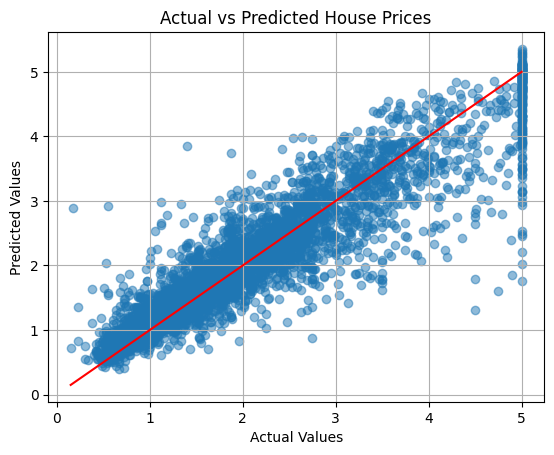

In [257]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
 # 45-degree line


plt.grid(True)
plt.show()